In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# https://www.akshare.xyz/zh_CN/latest/introduction.html
import akshare as ak
import pandas as pd
import rui_risk_kit as rrk

In [2]:
my_mutual_fund_list = ['161725', '163406', '004342', '002963']
fund_em_info_df = rrk.get_mf_values(my_mutual_fund_list, indicator='累计净值走势')
fund_em_info_df.tail()

,161725,163406,004342,002963
净值日期,,,,
2021-02-08,3.1397,8.4047,2.3742,1.2976
2021-02-09,3.1750,8.5636,2.4211,1.3116
2021-02-10,3.2509,8.6431,2.4683,1.3125
2021-02-18,3.1943,8.5625,2.4524,1.2751
2021-02-19,3.1852,8.5218,2.4565,1.2707


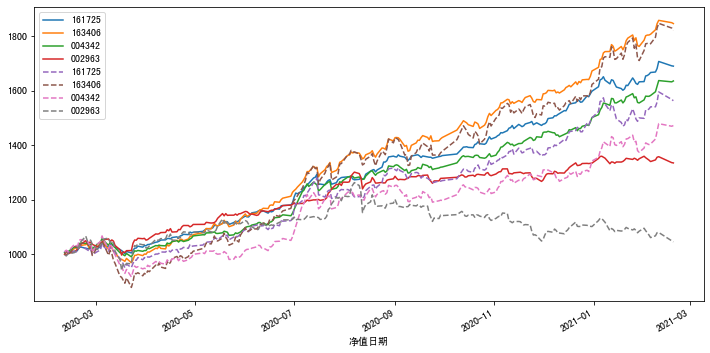

In [3]:
btr = rrk.run_cppi(fund_em_info_df['2020-02-09':][my_mutual_fund_list].pct_change().dropna(), drawdown = 0.2)
ax = btr['Wealth'].plot(figsize=(12,6), legend=True)
btr['Risky Wealth'].plot(ax=ax, style='--', legend=True)

In [4]:
rrk.summary_stats(btr['Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
161725,0.025160,0.020072,-0.425891,5.713451,0.007786,0.010377,-0.234732,-0.038416
163406,0.029838,0.028055,-0.721505,4.077427,0.012212,0.018017,-0.005647,-0.073619
004342,0.023617,0.023540,-0.049201,4.841550,0.009028,0.013598,-0.263953,-0.063621
002963,0.013971,0.021757,-0.697088,7.536619,0.009745,0.014707,-0.717011,-0.055880


In [5]:
rrk.summary_stats(btr['Risky Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
161725,0.021175,0.034263,-0.403017,5.446852,0.015053,0.019390,-0.250724,-0.085454
163406,0.029222,0.049297,-0.717897,4.189217,0.023276,0.033800,-0.015431,-0.161941
004342,0.018341,0.040884,-0.106965,4.726328,0.017734,0.025738,-0.277605,-0.140804
002963,0.002225,0.038400,-0.643948,8.305325,0.018705,0.027761,-0.703991,-0.172075
